# Data Augmentation

usamos ImageDataGenerator para generar imagenes nuevas en el ram mientras entrenamos para no desperdiciar espacio.

Found 259 images belonging to 3 classes.
Found 63 images belonging to 3 classes.
Class indices: {'Kobe Bryant': 0, 'Maria Sharapova': 1, 'Ronaldo': 2}


<Figure size 3000x400 with 0 Axes>

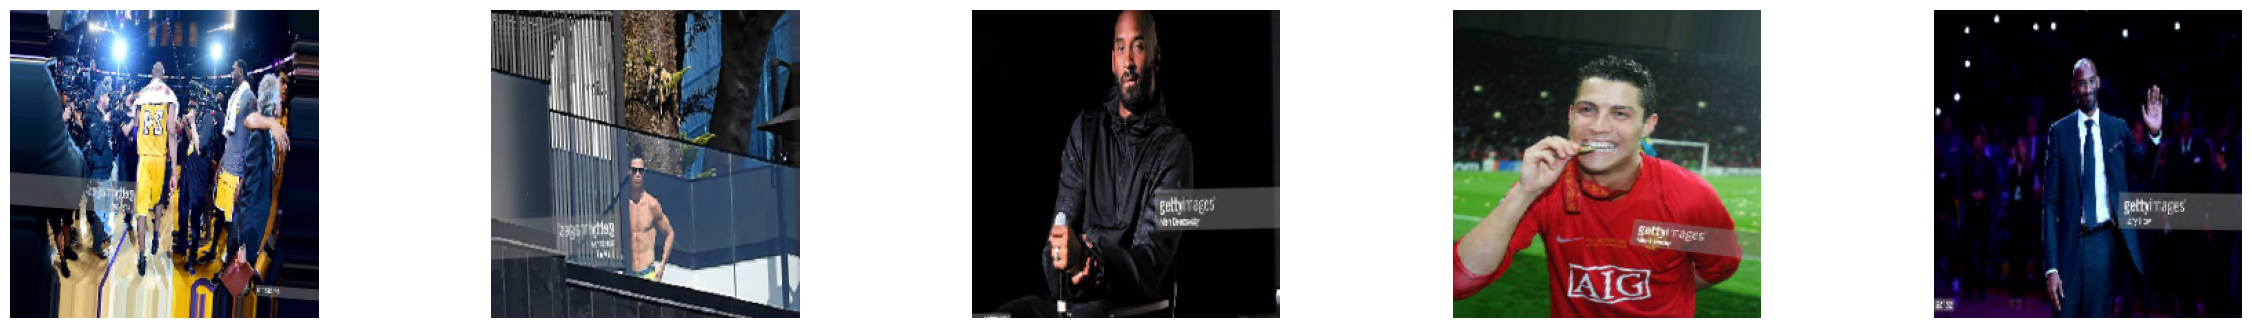

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers

base_dir = "IA/data_images"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    zoom_range=0.3,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)

print("Class indices:", train_generator.class_indices)

plt.figure(figsize=(30, 4))
f, axarr = plt.subplots(1, 5, figsize=(30, 4))

for i in range(5):
    images, labels = next(train_generator)
    axarr[i].imshow(images[0])
    axarr[i].axis("off")

plt.show()

<Figure size 640x480 with 0 Axes>

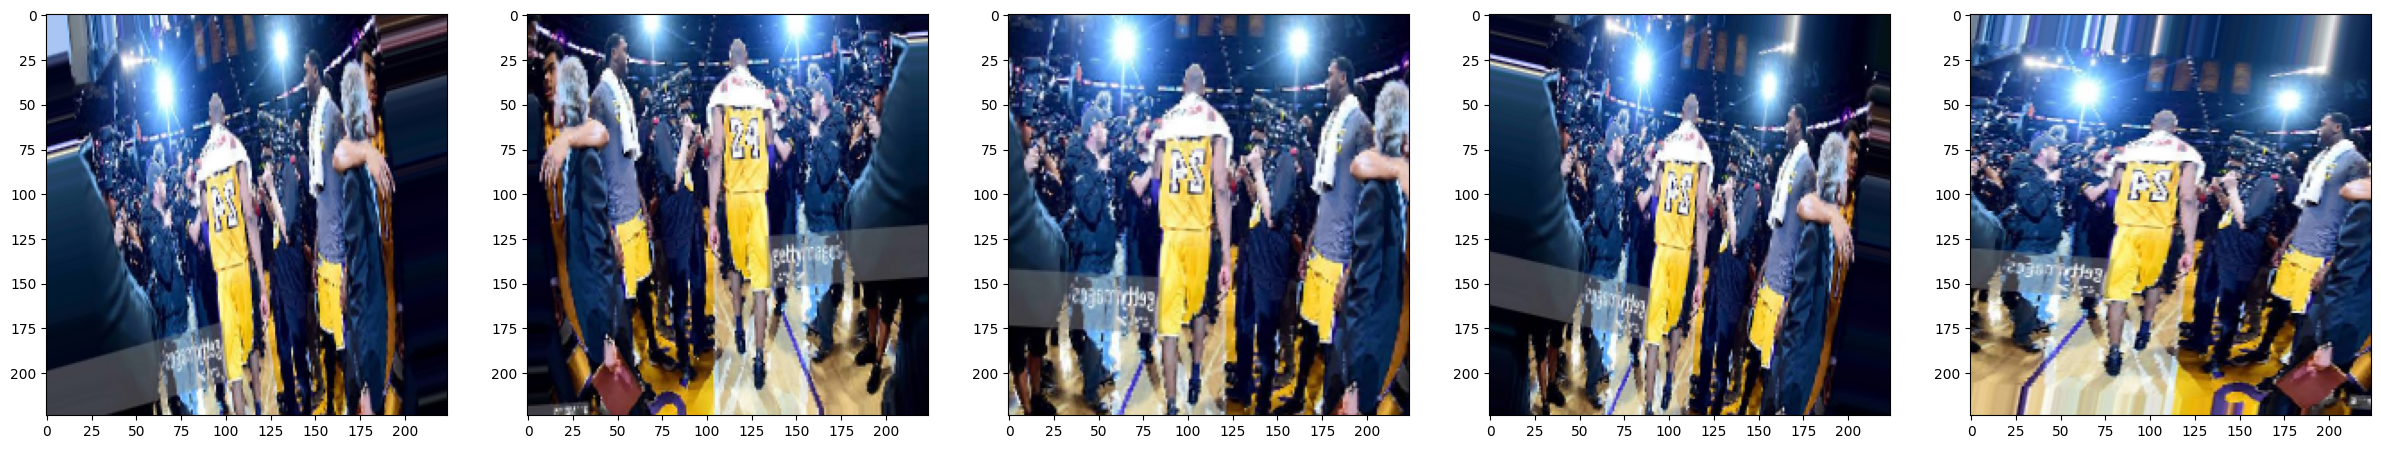

In [62]:
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

En este caso estamos tomando 8 imágenes y estomos modificando todas 1 vez cada una y las mostramos a manera de ejemplo.

(8, 224, 224, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


<Figure size 640x480 with 0 Axes>

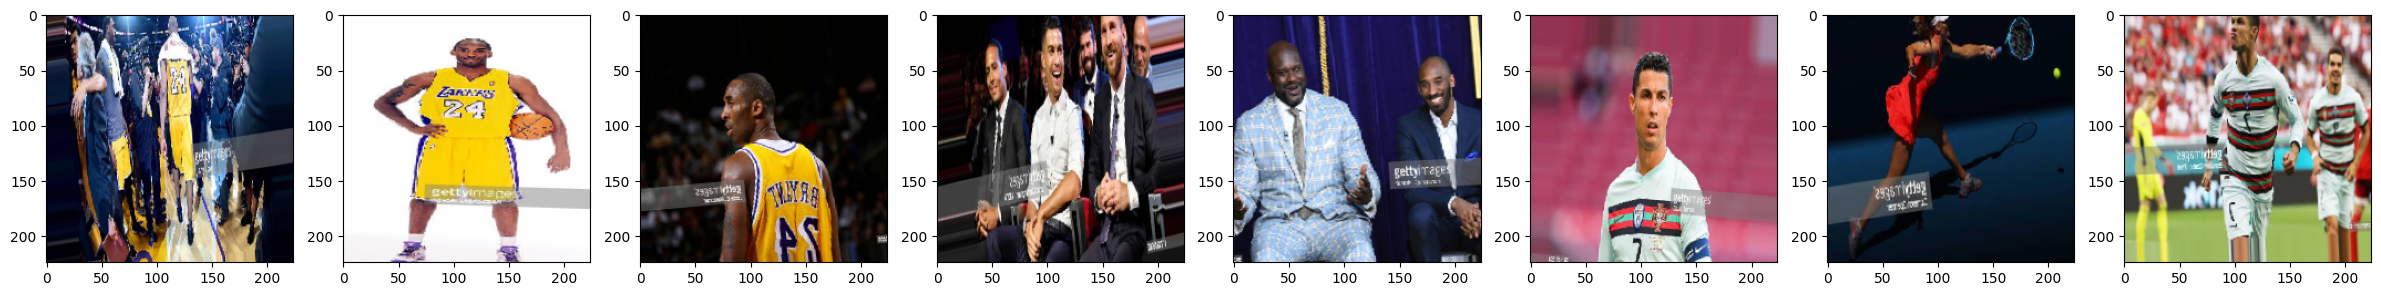

In [63]:
images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

In [64]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(3, activation='softmax'))


model.summary()

model.compile(loss='categorical_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['accuracy'])


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 52, 52, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │    88,605,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,977,539 (339.42 MB)

 Trainable params: 88,977,539 (339.42 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
import os

print("Classes detected:", os.listdir("IA/data_images"))

Classes detected: ['.DS_Store', 'Maria Sharapova', 'Ronaldo', 'Kobe Bryant']


Epoch 1/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 345ms/step - accuracy: 0.3752 - loss: 1.1533
Epoch 2/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 356ms/step - accuracy: 0.4277 - loss: 1.0636
Epoch 3/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 345ms/step - accuracy: 0.5381 - loss: 1.0029
Epoch 4/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 316ms/step - accuracy: 0.4450 - loss: 1.0084
Epoch 5/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 306ms/step - accuracy: 0.5439 - loss: 0.9543
Epoch 6/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 308ms/step - accuracy: 0.5882 - loss: 0.9338
Epoch 7/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 303ms/step - accuracy: 0.5647 - loss: 0.9710
Epoch 8/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 303ms/step - accuracy: 0.5904 - loss: 0.8976
Epoch 9/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 304ms/step - accuracy: 0.6035 - loss: 0.8392
Epoch 10/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 302ms/step - accuracy: 0.6301 - loss: 0.8275
Epoch 11/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 303ms/step - accuracy: 0.6560 - loss: 0.7553
Epoch 12/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 10

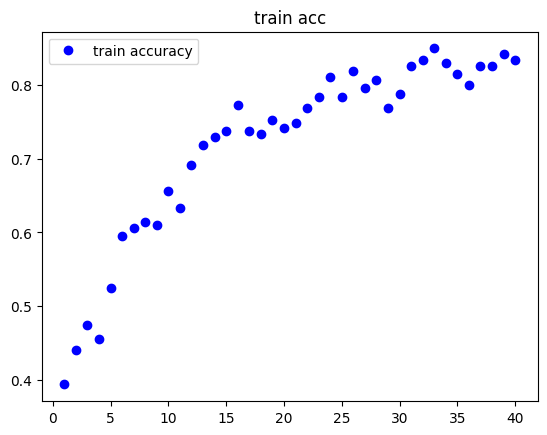

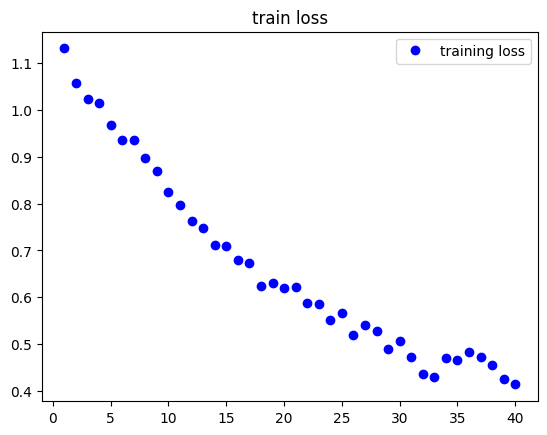

In [66]:
history = model.fit(
	train_generator,
	epochs=40,
)

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [67]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical',
		  shuffle=True
)

model.evaluate(test_generator)



Found 322 images belonging to 3 classes.


/Users/randuretana/.pyenv/versions/3.12.5/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 709ms/step - accuracy: 0.8257 - loss: 38.1676


[43.528114318847656, 0.8291925191879272]

In [68]:
test_imgs = test_generator[0][0]
test_labels = test_generator[0][1]


predictions = model.predict(test_imgs)
classes_x = np.argmax(predictions,axis=1)
classes_x

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step


array([0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 1, 1,
       1, 1, 1, 0, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 1, 1,
       2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 2, 2, 0, 1, 0, 2, 0, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 2, 0,
       2, 1, 0, 2, 0, 2, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0, 0, 2, 0, 0, 0, 2])

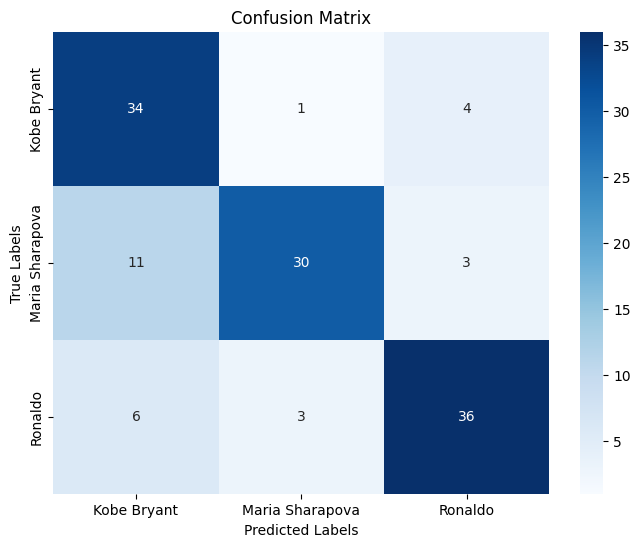

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

true_labels = np.argmax(test_labels, axis=1)

predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(train_generator.class_indices.keys()),
            yticklabels=list(train_generator.class_indices.keys()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Class Names: ['Kobe Bryant', 'Maria Sharapova', 'Ronaldo']
Found 322 images belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


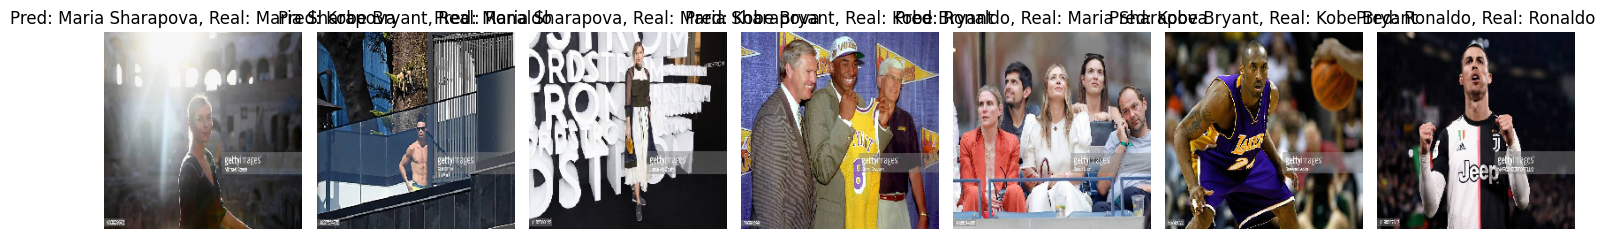

In [70]:
class_names = list(test_generator.class_indices.keys())
print("Class Names:", class_names)

#Prueba Visual
test_datagen = ImageDataGenerator(rescale=1./255)
test_generatorVISUAL = test_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=7,
    class_mode='categorical',
    shuffle=True
)

images, labels_one_hot = next(test_generatorVISUAL)

predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)

true_labels = np.argmax(labels_one_hot, axis=1)

images_desnormalizadas = (images * 255).astype(np.uint8)

plt.figure(figsize=(15, 5))
for i in range(test_generatorVISUAL.batch_size):
    plt.subplot(1, test_generatorVISUAL.batch_size, i + 1)
    plt.imshow(images_desnormalizadas[i])
    predicted_label = class_names[predicted_classes[i]]
    true_label = class_names[true_labels[i]]
    plt.title(f"Pred: {predicted_label}, Real: {true_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()